#NLP for text to predict the target

For runnign Machine Learning (ML) models on the data for classification, prediction or detection we use these steps:

1.   Collecting, loading, and cleaning data
2.   Build your model
3.   Train the data
4.   Evaluation & Prediction

###Question 
Propose a model of ML to read the data from dataset, understand and make a prediction fomr the text which contains the chatbot/call conversation of a Bank costomers. There are two files, 'Training_Dataset.xlsx' for training and 'Validation_dataset.csv' for testing and eveluations. 

##Implementation platform and reading 
In the first step, I read and load data locally. For the implementation due to being independent from installing python libraries such as Tensorflow and Keras,
I used colaboratory from Google which is a jupyter notebook file (https://colab.research.google.com). 
Data can be read directly from colab page. 

##Cleaning and exploring the data-set 
After reading the dataset, I had a look to see how many categories are in the data set and how many attribute is there for each category.
The graphs show the differences.
Recent process is done for both training and evaluation data. There are 28 different categories in training data-set.
While there are 29 categories in the test set. It means there is a category in the evaluation data that is not represented 
in training set. I removed it due to make more precise validation and prediction accuracy.
The class which is not seen during the training can not be in the test.

##Text cleaning and pre-processing
Furthermore, I did some text cleaning to improvove the quality of training with removing not useful and not important words and characters
such as stop words,  punctuation, bad characters, change text to lower case. A sample of training data-set is presented before and after cleaning text processing.

##Build Machine Learning models
Subsequently, I defined a pipeline model with using 4 different ML algorithms.

1.  Naive Bayes Classifier
2.  Logistic Regression
3.  Stochastic Gradient Descent (SGD)
4.  Neural Network (Deep Learning)

The accuracy of prediction for any of above models are 0.58, 0.71, 0.73 and 0.97 respectively. 




In [61]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
#files.upload('Training_dataset.xlsx')
#!rm Training_dataset.xlsx
#!rm Validation_dataset.csv

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Training_dataset.xlsx to Training_dataset (6).xlsx
Saving Validation_dataset.csv to Validation_dataset (6).csv
User uploaded file "Training_dataset.xlsx" with length 33489 bytes
User uploaded file "Validation_dataset.csv" with length 26457 bytes


In [64]:
df = pd.read_excel('Training_dataset.xlsx')
df = df[pd.notnull(df['TARGET'])]
dft=pd.read_csv('Validation_dataset.csv',sep=';')
dft = dft[pd.notnull(dft['TARGET'])]
print(df.head(10))
print(dft.head(10))

                                               TEXT           TARGET
0                 I want to activate my credit card  activate_card_0
1              I don't know how to activate my card  activate_card_0
2                        I want to activate my card  activate_card_0
3      Why is your activation process not working ?  activate_card_0
4                        My bank card is not active  activate_card_0
5                         I cannot activate my card  activate_card_0
6                    How can I start using my card?  activate_card_0
7                  I want to activate my debit card  activate_card_0
8              I need your help to activate my card  activate_card_0
9  Please activate my card for me, it's not working  activate_card_0
                                     TEXT                    TARGET
0          I want to use my card in Japan  use_abroad_0f_non_europe
1                    Activate card abroad              use_abroad_0
2       I want to use my card in Port

In [0]:
my_Labels = ['activate_card_0','pin_by_sms_0','get_card_limit_0','info_card_types_credit_0','order_card_0','use_abroad_0','info_charges_abroad_0','new_pin_0',
           'use_abroad_0f_non_europe','contactless_0','unblock_card_0','cards_overview_0','modify_limit_0','lost_card_0 ', 'activate_card_0','balance_0',
           'card_stop_0','use_abroad_0e_europe','new_card_reader_0','use_abroad_0a_credit','info_abroad_0','get_transaction_info_0','use_abroad_0b_debit',
           'info_CVC_CVV_0 ','order_card_0e_replacement','info_card_number_0', 'order_card_0d_extra','info_card_expiration_0 '
           
          ]

In [66]:
print(df['TEXT'].apply(lambda x: len(x.split(' '))).sum()) #number of words in the Message column before cleaning

7181


889

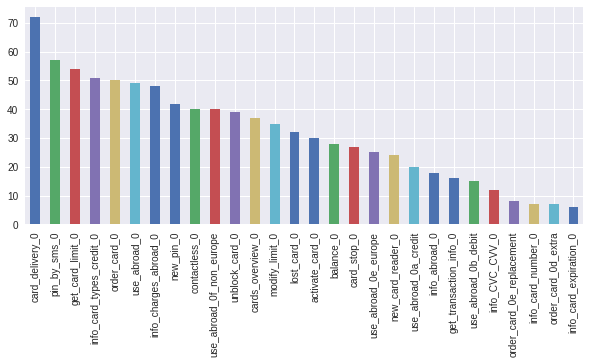

In [67]:
#training set
plt.figure(figsize=(10,4))
df.TARGET.value_counts().plot(kind='bar');
df.TARGET.size

439

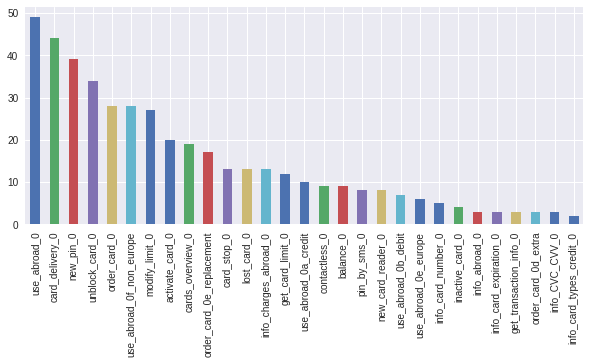

In [68]:
#test set
plt.figure(figsize=(10,4))
dft.TARGET.value_counts().plot(kind='bar');
dft.TARGET.size

There is one taget in the test data set that is not in the Training set!! We need to find and clean it from test data set

In [69]:
dft = dft.replace('inactive_card_0', np.nan).dropna()
print(dft.TARGET.value_counts())
dft.TARGET.size

use_abroad_0                 49
card_delivery_0              44
new_pin_0                    39
unblock_card_0               34
use_abroad_0f_non_europe     28
order_card_0                 28
modify_limit_0               27
activate_card_0              20
cards_overview_0             19
order_card_0e_replacement    17
info_charges_abroad_0        13
lost_card_0                  13
card_stop_0                  13
get_card_limit_0             12
use_abroad_0a_credit         10
balance_0                     9
contactless_0                 9
new_card_reader_0             8
pin_by_sms_0                  8
use_abroad_0b_debit           7
use_abroad_0e_europe          6
info_card_number_0            5
info_abroad_0                 3
info_card_expiration_0        3
get_transaction_info_0        3
order_card_0d_extra           3
info_CVC_CVV_0                3
info_card_types_credit_0      2
Name: TARGET, dtype: int64


435

In [70]:
#see some text and 
def print_plot(index):
    example = df[df.index == index][['TEXT','TARGET']].values[0]
    if len(example) > 0:
        print(example[0])
        print(example[1])
print_plot(10) # you can print any Attribute here with changing the index

Do I have to do anything before I can use my card?
activate_card_0


In [71]:
#print a group of training set
for i in range(25 , 35):
  print_plot(i)
  

Do I have to do something before I can use my card?
activate_card_0
I need to activate my debit card
activate_card_0
I have to unlock my credit card
activate_card_0
I have my card, what should I do?
activate_card_0
activate card please
activate_card_0
does my account have money on it?
balance_0
do i have money?
balance_0
what is my balance
balance_0
Where can I get my card statement?
balance_0
what's my balance?
balance_0


In [72]:
'''
text cleaning step includes remove stop words,
change text to lower case, remove punctuation, remove bad characters, and so on.
'''
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
   
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['TEXT'] = df['TEXT'].apply(clean_text) # clean training set
dft['TEXT'] = dft['TEXT'].apply(clean_text) # clean test set
#df['AdditionalCondition'] = df['AdditionalCondition'].apply(clean_text)

print_plot(21) # just an example you can change the index print_plot(index)

help activate card
activate_card_0


In [73]:
#print a group of training set after cleaning
for i in range(25 , 35):
  print_plot(i)
  

something use card
activate_card_0
need activate debit card
activate_card_0
unlock credit card
activate_card_0
card
activate_card_0
activate card please
activate_card_0
account money
balance_0
money
balance_0
balance
balance_0
get card statement
balance_0
whats balance
balance_0


In [74]:
print(df['TEXT'].apply(lambda x: len(x.split(' '))).sum()) #number of words in the TEXT column After cleaning training set
print(dft['TEXT'].apply(lambda x: len(x.split(' '))).sum()) #number of words in the TEXT column After cleaning test set

3409
1988


In [0]:
X_train = df.TEXT
y_train = df.TARGET
#X_train, X_test, y_train, y_test = train_test_split(X_train,y_train , test_size=0.7, random_state = 42)
X_test = dft.TEXT
y_test = dft.TARGET

In [76]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
# Print a human readable report
print(classification_report(y_test, y_pred,target_names=my_Labels))

accuracy 0.5885057471264368
                           precision    recall  f1-score   support

          activate_card_0       0.89      0.40      0.55        20
             pin_by_sms_0       0.83      0.56      0.67         9
         get_card_limit_0       0.50      0.91      0.65        44
 info_card_types_credit_0       1.00      0.69      0.82        13
             order_card_0       0.94      0.84      0.89        19
             use_abroad_0       1.00      1.00      1.00         9
    info_charges_abroad_0       0.38      0.75      0.50        12
                new_pin_0       0.00      0.00      0.00         3
 use_abroad_0f_non_europe       0.00      0.00      0.00         3
            contactless_0       0.00      0.00      0.00         3
           unblock_card_0       0.00      0.00      0.00         3
         cards_overview_0       0.00      0.00      0.00         5
           modify_limit_0       0.09      1.00      0.17         2
             lost_card_0        0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_Labels))

accuracy 0.7149425287356321
                           precision    recall  f1-score   support

          activate_card_0       0.56      0.95      0.70        20
             pin_by_sms_0       1.00      0.89      0.94         9
         get_card_limit_0       0.75      0.89      0.81        44
 info_card_types_credit_0       0.91      0.77      0.83        13
             order_card_0       0.70      0.84      0.76        19
             use_abroad_0       0.90      1.00      0.95         9
    info_charges_abroad_0       0.47      0.58      0.52        12
                new_pin_0       0.40      0.67      0.50         3
 use_abroad_0f_non_europe       1.00      1.00      1.00         3
            contactless_0       0.21      1.00      0.35         3
           unblock_card_0       0.67      0.67      0.67         3
         cards_overview_0       0.50      0.20      0.29         5
           modify_limit_0       0.00      0.00      0.00         2
             lost_card_0        1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [80]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])
#loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_Labels))

accuracy 0.7310344827586207
                           precision    recall  f1-score   support

          activate_card_0       0.58      0.95      0.72        20
             pin_by_sms_0       0.75      1.00      0.86         9
         get_card_limit_0       0.73      0.91      0.81        44
 info_card_types_credit_0       1.00      0.85      0.92        13
             order_card_0       0.94      0.84      0.89        19
             use_abroad_0       0.82      1.00      0.90         9
    info_charges_abroad_0       0.53      0.83      0.65        12
                new_pin_0       0.50      0.67      0.57         3
 use_abroad_0f_non_europe       1.00      1.00      1.00         3
            contactless_0       0.23      1.00      0.38         3
           unblock_card_0       0.40      0.67      0.50         3
         cards_overview_0       0.50      0.40      0.44         5
           modify_limit_0       0.12      0.50      0.20         2
             lost_card_0        0

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [81]:
# Neural Network (deep Learning)
import itertools
import os
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df))
train_posts = df['TEXT'][:train_size]
train_tags = df['TARGET'][:train_size]

test_size = int(len(dft))
test_posts = dft['TEXT'][test_size:]
test_tags = dft['TARGET'][test_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 23
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
model.summary()
accuracy=model.evaluate(x_test, y_test)
print('Accuracy',accuracy)

Epoch 1/20
889/889 [==============================] - 1s 756us/step - loss: 3.2042 - acc: 0.1755
Epoch 2/20
889/889 [==============================] - 0s 488us/step - loss: 2.7566 - acc: 0.4297
Epoch 3/20
889/889 [==============================] - 0s 506us/step - loss: 2.2176 - acc: 0.5546
Epoch 4/20
889/889 [==============================] - 0s 476us/step - loss: 1.6867 - acc: 0.6772
Epoch 5/20
889/889 [==============================] - 0s 461us/step - loss: 1.2617 - acc: 0.7570
Epoch 6/20
889/889 [==============================] - 0s 463us/step - loss: 0.9562 - acc: 0.8166
Epoch 7/20
889/889 [==============================] - 0s 463us/step - loss: 0.7470 - acc: 0.8560
Epoch 8/20
889/889 [==============================] - 0s 459us/step - loss: 0.6094 - acc: 0.8808
Epoch 9/20
889/889 [==============================] - 0s 482us/step - loss: 0.5029 - acc: 0.9156
Epoch 10/20
889/889 [==============================] - 0s 463us/step - loss: 0.4093 - acc: 0.9235
Epoch 11/20
889/889 [========